# Labs 2

## Przygotuj program generujący następujące zbiory punktów na płaszczyźnie (współrzędne rzeczywiste typu double):
    a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100],
    b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10,
    c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),
    d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from time import perf_counter
from functools import partial
%matplotlib inline
sns.set_style('darkgrid')

# Rozwiązanie

**a) 100 losowo wygenerowanych punktów o współrzędnych z przedziału [-100, 100]**

In [2]:
data_a = np.random.uniform(-100, 100, size = [100, 2])

In [3]:
data_a[:10]

array([[ 15.38729139,   5.42573508],
       [-71.29726183, -70.51771057],
       [ 95.36717287,  21.53958095],
       [-17.68508966,  92.52997057],
       [ -7.64902711, -52.28374425],
       [-87.1382865 , -19.92486997],
       [ 43.83922447, -73.2581177 ],
       [ 34.83362764, -13.50514893],
       [-98.26953393, -21.85610168],
       [ 65.09878765,  85.49861879]])

In [4]:
df_a = pd.DataFrame(data=data_a, columns=['X', 'Y'])

In [5]:
df_a.head()

,X,Y
0,15.387291,5.425735
1,-71.297262,-70.517711
2,95.367173,21.539581
3,-17.685090,92.529971
4,-7.649027,-52.283744


In [6]:
df_a.describe()

,X,Y
count,100.000000,100.000000
mean,-4.069677,8.280719
std,56.930849,57.175281
min,-99.195158,-94.186577
25%,-50.038130,-39.333845
50%,-7.038637,11.316691
75%,46.073052,55.975440
max,97.130141,98.982277


**b) 100 losowo wygenerowanych punktów leżących na okręgu o środku (0,0) i promieniu R=10**

In [7]:
data_b = [None for _ in range(100)]
for i in range(100):
    alpha = 2 * np.pi * np.random.random_sample()
    data_b[i] = (10 * np.cos(alpha), 10 * np.sin(alpha))

In [8]:
data_b[:10]

[(9.802967477178031, 1.9753046958355007),
 (-1.6875769345636655, -9.856575677684857),
 (4.240440838540242, 9.056415488196206),
 (-7.411732090327391, 6.713138418147741),
 (-5.131218566108419, 8.583157695558452),
 (4.911733714423563, 8.710618343068127),
 (-7.7044180177211254, -6.375103372355157),
 (5.1944272291651705, 8.545052706736655),
 (-2.654485219058438, 9.641250345354603),
 (-9.784858735948605, -2.0631382691255253)]

In [9]:
df_b = pd.DataFrame(data=data_b, columns=['X', 'Y'])

In [10]:
df_b.head()

,X,Y
0,9.802967,1.975305
1,-1.687577,-9.856576
2,4.240441,9.056415
3,-7.411732,6.713138
4,-5.131219,8.583158


In [11]:
df_b.describe()

,X,Y
count,100.000000,100.000000
mean,0.593495,0.802815
std,7.329264,6.803321
min,-9.988250,-9.999806
25%,-7.047516,-5.380677
50%,1.435898,1.370514
75%,7.801494,6.913843
max,9.999701,9.997491


**c) 100 losowo wygenerowanych punktów leżących na bokach prostokąta     o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10)**

In [12]:
a = (-10, 10)
b = (-10, -10)
c = (10, -10)
d = (10, 10)

first_perimeter = abs(a[1] - b[1])
second_perimeter =  abs(b[0] - c[0])
total_range = 2 * first_perimeter + 2 * second_perimeter

# [0, 20] range - left side of the rectangle
# (20, 40] range - bottom side of the rectangle
# (40, 60] range - right side of the rectangle
# (60, 80] range - upper side of the rectangle

data_c = []
for _ in range(100):
    point = np.random.uniform(0, total_range)
    
    #left side
    if 0 <= point <= 20:
        result = (-10, point-10)
        
    # bottom side
    elif 20 < point <= 40:
        if point < 30:
            result = (point%10 - 10, -10)
        else:
            result = ((point-10) % 10, -10)
            
    # right side
    elif 40 < point <= 60:
        if point < 50:
            result = (10, point%10 - 10)
        else:
            result = (10, (point-10) % 10)
            
    # upper side
    else:
        if point < 70:
            result = (point%10 - 10, 10)
        else:
            result = ((point-10) % 10, 10)
    data_c.append(result)

In [13]:
data_c[:10]

[(-10, 7.890974097953709),
 (-10, -6.383395955998372),
 (-10, 7.899137964224437),
 (-4.228798747434908, -10),
 (-10, -5.090268390211952),
 (10, -8.85950901891303),
 (6.232735121947286, 10),
 (10, -4.021440710265651),
 (7.183187302287365, 10),
 (2.82887943805693, 10)]

In [14]:
df_c = pd.DataFrame(data=data_c, columns=['X', 'Y'])

In [15]:
df_c.head()

,X,Y
0,-10.000000,7.890974
1,-10.000000,-6.383396
2,-10.000000,7.899138
3,-4.228799,-10.000000
4,-10.000000,-5.090268


In [16]:
df_c.describe()

,X,Y
count,100.000000,100.000000
mean,0.230501,1.973445
std,8.054726,8.056711
min,-10.000000,-10.000000
25%,-10.000000,-5.382046
50%,1.983634,3.542103
75%,8.241377,10.000000
max,10.000000,10.000000


**d) wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu**

In [17]:
a = (0, 0)
b = (10, 0)
c = (10, 10)
d = (0, 10)

total_range = 2 * 10

# [0, 10] range - left side of the square (X axis)
# (10, 20] range - bottom side of the square (Y axis)

# [0, 10] range - right-upper diagonal of the square
# (10, 20) range - left-upper diagonal of the square

data_d = []
for _ in range(25):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        side_result = (0, point)
    else:
        side_result = (point-10, 0)
    data_d.append(side_result)
        
for _ in range(20):
    point = np.random.uniform(0, total_range)
    if 0 <= point <= 10:
        diag_result = (point, point)
    else:
        diag_result = (point-10, 10-(point-10))
    data_d.append(diag_result)

In [18]:
data_d[:10]

[(4.613973531470297, 0),
 (0.5626181595398609, 0),
 (1.7577023655556943, 0),
 (1.7373178576876818, 0),
 (0, 3.9838579207042524),
 (0, 1.6930692007603554),
 (7.126613087218551, 0),
 (1.6521280677832113, 0),
 (1.1827841642935244, 0),
 (0, 5.2586030947738465)]

In [19]:
df_d = pd.DataFrame(data=data_d, columns=['X', 'Y'])

In [20]:
df_d.head()

,X,Y
0,4.613974,0.000000
1,0.562618,0.000000
2,1.757702,0.000000
3,1.737318,0.000000
4,0.000000,3.983858


In [21]:
df_d.describe()

,X,Y
count,45.000000,45.000000
mean,3.166096,4.169509
std,3.206429,3.436323
min,0.000000,0.000000
25%,0.000000,0.034652
50%,2.310775,5.076948
75%,5.562274,7.082272
max,9.965348,9.724466


---
## Uruchom wizualizację graficzną utworzonych zbiorów punktów.

**a)**

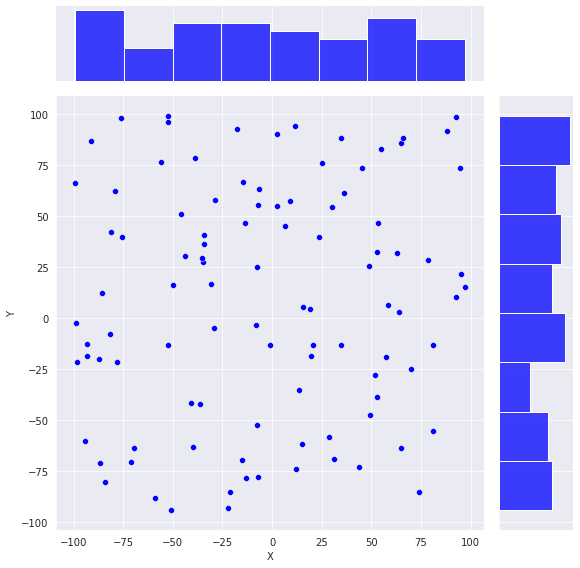

In [22]:
sns.jointplot(data=df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

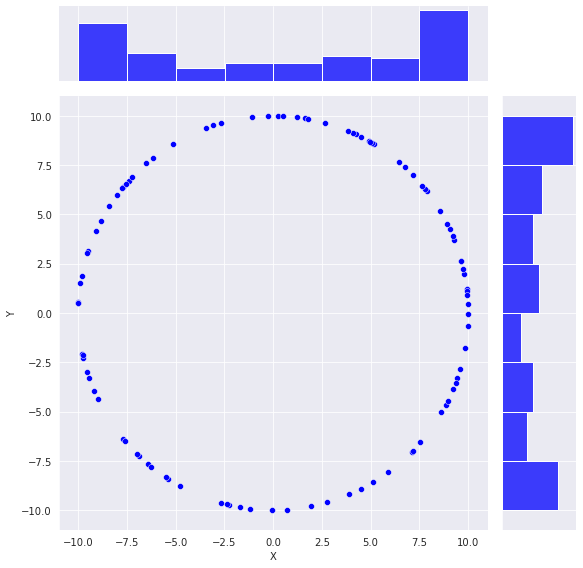

In [23]:
sns.jointplot(data=df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

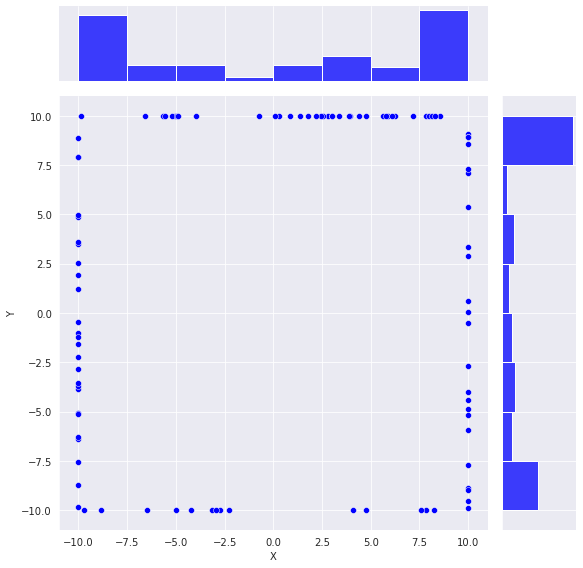

In [24]:
sns.jointplot(data=df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

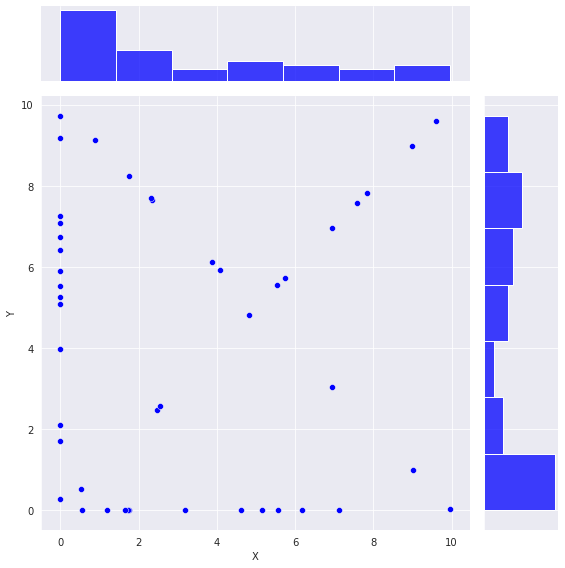

In [25]:
sns.jointplot(data=df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych parametrów dla schematów losowania punktów podanych powyżej:
    a) liczba punktów, przedziały dla współrzędnych,
    b) liczba punktów, środek i promień okręgu,
    c) liczba punktów, wierzchołki prostokąta,
    d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

**a)**

In [26]:
def random_points_on_the_range(num_of_points, ranges):
    new_data_a = np.random.uniform(ranges[0], ranges[1], size = [num_of_points, 2])
    return new_data_a

In [27]:
new_data_a = random_points_on_the_range(40, [-200, 200])

In [28]:
new_data_a[:10]

array([[ 128.02899074,   72.65675205],
       [ -88.6220742 ,   -3.60008483],
       [-189.41974124,  -99.93659314],
       [  16.92641249,  -32.35990394],
       [ -38.82097728,   14.38456486],
       [ 106.68395438,   61.06269518],
       [ 150.77464432,  -63.67850634],
       [ -96.81392978,  -53.90178405],
       [-176.45891175,  131.97524819],
       [ 101.070097  , -132.82809411]])

In [29]:
new_df_a = pd.DataFrame(data=new_data_a, columns=['X', 'Y'])

In [30]:
new_df_a.head()

,X,Y
0,128.028991,72.656752
1,-88.622074,-3.600085
2,-189.419741,-99.936593
3,16.926412,-32.359904
4,-38.820977,14.384565


In [31]:
new_df_a.describe()

,X,Y
count,40.000000,40.000000
mean,7.372787,17.341554
std,116.710189,125.828321
min,-189.419741,-181.459357
25%,-101.519815,-85.224355
50%,17.913107,8.815366
75%,103.609082,129.263844
max,198.351326,198.895073


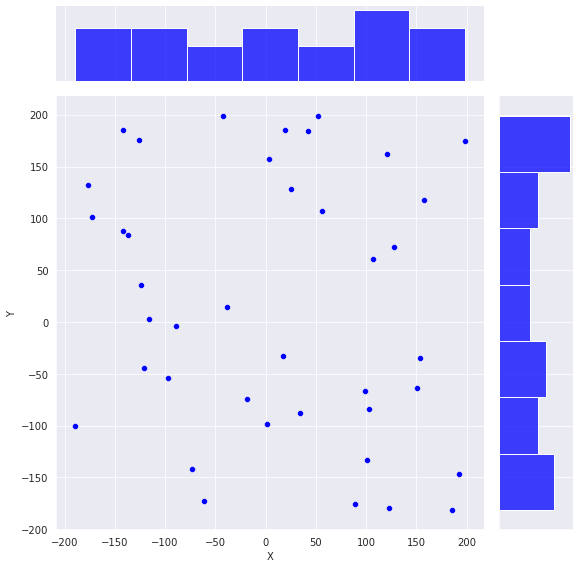

In [32]:
sns.jointplot(data=new_df_a, x='X', y='Y', kind='scatter', height=8, color='blue')

**b)**

In [33]:
def random_points_on_the_circle(num_of_points, center, R):
    new_data_b = [None for _ in range(num_of_points)]
    for i in range(num_of_points):
        alpha = 2 * np.pi * np.random.random_sample()
        new_data_b[i] = (R * np.cos(alpha) + center[0], R * np.sin(alpha) + center[1])
    return new_data_b

In [34]:
new_data_b = random_points_on_the_circle(30, [50, 50], 120)

In [35]:
new_data_b[:10]

[(153.16464066911502, -11.294835962031748),
 (-69.5941823656387, 59.860605675837284),
 (-26.287448130536404, -42.62950533027106),
 (169.92436905667455, 54.25977773581214),
 (32.72585247640133, -68.75017400969546),
 (13.770791315206331, 164.40036904692954),
 (-33.77973228611981, -35.91249302671932),
 (132.13322338697162, -37.48790554165656),
 (-69.1375993100732, 35.6392050835462),
 (-68.41072168350537, 69.4653792768451)]

In [36]:
new_df_b = pd.DataFrame(data=new_data_b, columns=['X', 'Y'])

In [37]:
new_df_b.head()

,X,Y
0,153.164641,-11.294836
1,-69.594182,59.860606
2,-26.287448,-42.629505
3,169.924369,54.259778
4,32.725852,-68.750174


In [38]:
new_df_b.describe()

,X,Y
count,30.000000,30.000000
mean,46.468855,31.188162
std,83.156879,87.192305
min,-69.594182,-68.833203
25%,-25.922590,-43.516684
50%,49.709631,4.254036
75%,119.456268,124.515056
max,169.924369,165.572236


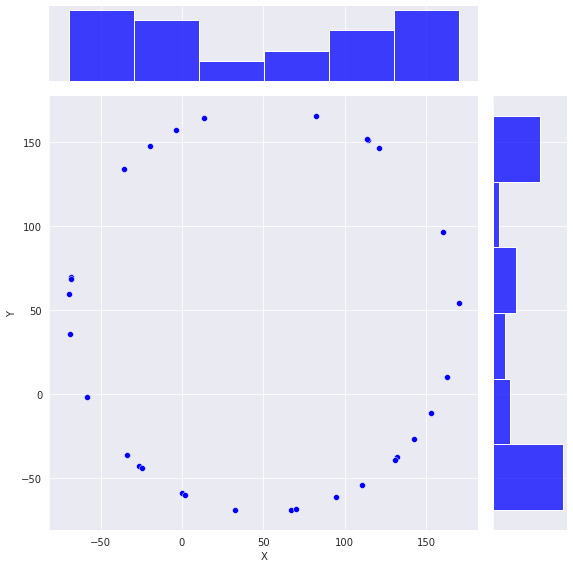

In [39]:
sns.jointplot(data=new_df_b, x='X', y='Y', kind='scatter', height=8, color='blue')

**c)**

In [40]:
def random_points_on_the_rectangle(num_of_points, vertices):
    min_y = min_x = np.inf
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])

    x_side = abs(max_x - min_x)
    y_side = abs(max_y - min_y)
    total_range = 2 * x_side + 2 * y_side
    ranges = [(0, y_side), (y_side, 2 * y_side),
              (2 * y_side, 2 * y_side + x_side), (2 * y_side + x_side, total_range)]

    new_data_c = []
    for _ in range(num_of_points):
        point = np.random.uniform(0, total_range)

        # left side
        if ranges[0][0] <= point <= ranges[0][1]:
            result = (min_x, min_y + point)

        # right side
        elif ranges[1][0] < point <= ranges[1][1]:
            result = (max_x, min_y + (point - ranges[1][0]))

        # bottom side
        elif ranges[2][0] < point <= ranges[2][1]:
            result = (min_x + (point - ranges[2][0]), min_y)

        # upper side
        else:
            result = (min_x + (point - ranges[3][0]), max_y)
        new_data_c.append(result)
    return new_data_c

In [41]:
new_data_c = random_points_on_the_rectangle(40, [(-30, -10), (-30, 40), (50, 40), (50, -10)])

In [42]:
new_data_c[:10]

[(-22.439287898226667, 40),
 (49.70795188681322, -10),
 (10.080349831197879, 40),
 (-9.50029961338494, -10),
 (-1.6776856758247334, 40),
 (3.683043765286385, -10),
 (-30, 2.370581798128393),
 (-9.782631674590505, -10),
 (-30, 30.641193705131997),
 (-22.837831978513762, -10)]

In [43]:
new_df_c = pd.DataFrame(data=new_data_c, columns=['X', 'Y'])

In [44]:
new_df_c.head()

,X,Y
0,-22.439288,40.0
1,49.707952,-10.0
2,10.080350,40.0
3,-9.500300,-10.0
4,-1.677686,40.0


In [45]:
new_df_c.describe()

,X,Y
count,40.000000,40.000000
mean,7.991548,11.278278
std,31.233411,22.522535
min,-30.000000,-10.000000
25%,-22.538924,-10.000000
50%,3.234098,1.562562
75%,43.960849,40.000000
max,50.000000,40.000000


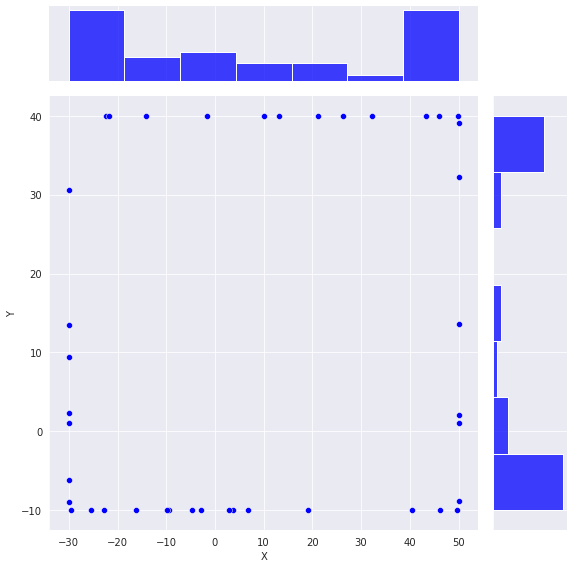

In [46]:
sns.jointplot(data=new_df_c, x='X', y='Y', kind='scatter', height=8, color='blue')

**d)**

In [47]:
def random_points_on_square(vertices, side_num_of_points, diag_num_of_points):
    min_y = min_x = np.inf 
    max_y = max_x = -np.inf
    for v in vertices:
        min_x = min(min_x, v[0])
        min_y = min(min_y, v[1])
        max_x = max(max_x, v[0])
        max_y = max(max_y, v[1])
    
    side = abs(max_x-min_x)
    total_range = 2 * side

    new_data_d = []
    for _ in range(side_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            side_result = (min_x, min_y+point)
        else:
            side_result = (min_x+(point-total_range/2), min_y)
        new_data_d.append(side_result)

    for _ in range(diag_num_of_points):
        point = np.random.uniform(0, total_range)
        if 0 <= point <= total_range/2:
            diag_result = (min_x+point, min_y+point)
        else:
            diag_result = (min_x+(point-total_range/2), max_y-(point-total_range/2))
        new_data_d.append(diag_result)
    return new_data_d

In [48]:
new_data_d = random_points_on_square([(-30, -10), (-30, 30), (10, 30), (10, -10)], 40, 20)

In [49]:
new_data_d[:10]

[(-30, 26.17070396981302),
 (-30, -7.3415627437882325),
 (-30, 2.824385527286468),
 (8.490963776072036, -10),
 (-30, -9.139617247785106),
 (-3.9960684013152843, -10),
 (-30, 15.872384786947357),
 (-30, 22.59285053195447),
 (-2.575548768913407, -10),
 (-18.51258846799731, -10)]

In [50]:
new_df_d = pd.DataFrame(data=new_data_d, columns=['X', 'Y'])

In [51]:
new_df_d.head()

,X,Y
0,-30.000000,26.170704
1,-30.000000,-7.341563
2,-30.000000,2.824386
3,8.490964,-10.000000
4,-30.000000,-9.139617


In [52]:
new_df_d.describe()

,X,Y
count,60.000000,60.000000
mean,-15.889305,3.676722
std,13.975652,14.120684
min,-30.000000,-10.000000
25%,-30.000000,-10.000000
50%,-16.477671,-3.098924
75%,-4.387946,15.979050
max,8.974685,28.683458


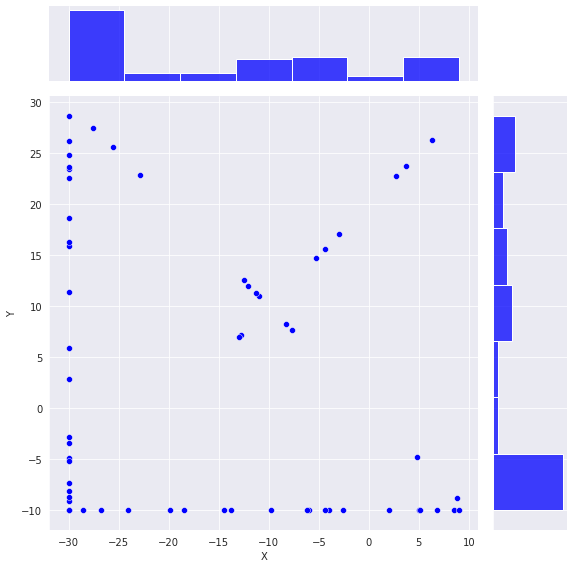

In [53]:
sns.jointplot(data=new_df_d, x='X', y='Y', kind='scatter', height=8, color='blue')

---
## Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość sprawdzenia czasu działania algorytmu.

In [54]:
def scatter_plot(df, hull, algorithm):
    if algorithm.__name__ == "graham_algorithm":
        points = df
        x, y = zip(*points)
    else:
        x, y = df['X'], df['Y']
    plt.scatter(x, y, c='red')
    if len(hull) != 0:
        for i in range(len(hull)):
            if i == len(hull) - 1:
                i = -1
            x1, y1 = hull[i]
            x2, y2 = hull[i + 1]
            plt.plot((x1, x2), (y1, y2), linestyle='-', color='blue')
            plt.scatter((x1, x2), (y1, y2), c='blue')
    plt.show()

### Algorytm Grahama

In [55]:
def distance(point_1, point_2):
    return np.sqrt((point_1[0] - point_2[0]) ** 2 + (point_1[1] - point_2[1]) ** 2)


def compare(a, b, c, epsilon):
    orientation = det(c, a, b)
    if -epsilon <= orientation <= epsilon:
        return distance(a, c) < distance(b, c)
    else:
        return orientation > epsilon


def find_lowest_point(df_points):
    lowest_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[1] < lowest_point[1]:
            lowest_point = point
        elif point[1] == lowest_point[1] and point[0] < lowest_point[0]:
            lowest_point = point
    return lowest_point


def det(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    first = (a_x - c_x) * (b_y - c_y)
    second = (a_y - c_y) * (b_x - c_x)
    return first - second

def quicksort(points, l, r, comparator = lambda x, y: x < y):
    if l == r:
        return
    mid = (l + r) // 2
    pivot = points[mid]
    idx = l
    points[r - 1], points[mid] = points[mid], points[r - 1]
    for i in range(l, r - 1):
        if comparator(points[i], pivot):
            points[i], points[idx] = points[idx], points[i]
            idx += 1
    points[r - 1], points[idx] = points[idx], points[r - 1]
    quicksort(points, l, idx, comparator)
    quicksort(points, idx + 1, r, comparator)

In [56]:
def graham_algorithm(df, epsilon=10 ** (-12), write_to_file=False, visualize=True):
    lowest_point = find_lowest_point(df)
    points = []
    for index, row in df.iterrows():
        points.append((df['X'][index], df['Y'][index]))
    
    comparator = partial(compare, c = lowest_point, epsilon=epsilon)
    quicksort(points, 0, len(points), comparator)
    convex_hull = [points[0], points[1], points[2]]
    
    for point in points[3:]:
        orientation = det(convex_hull[-2], convex_hull[-1], point)
        while orientation < -epsilon:
            convex_hull.pop()
            orientation = det(convex_hull[-2], convex_hull[-1], point)
        if -epsilon <= orientation <= epsilon:
            convex_hull.pop()
        convex_hull.append(point)
        if visualize:
            scatter_plot(points, convex_hull, graham_algorithm)
    if visualize:
        scatter_plot(points, convex_hull, graham_algorithm)
    return convex_hull 

### Algorytm Jarvisa

In [57]:
def find_left_most_point(df_points):
    left_most_index = 0
    left_most_point = (np.inf, np.inf)
    for index, row in df_points.iterrows():
        point = (row['X'], row['Y'])
        if point[0] < left_most_point[0]:
            left_most_point = point
            left_most_index = index
        elif point[0] == left_most_point[0] and point[1] < left_most_point[1]:
            left_most_point = point
            left_most_index = index
    return left_most_point, left_most_index

def distance(point_1, point_2):
    return (point_2[0] - point_1[0]) ** 2 + (point_2[1] - point_1[1]) ** 2

In [58]:
def jarvis_algorithm(df, epsilon=10 ** (-12), write_to_file=False, visualize=True):
    convex_point, convex_idx = find_left_most_point(df)
    convex_hull = [convex_point]
    p = convex_idx
    while True:
        q = (p + 1) % len(df)
        for index, row in df.iterrows():
            if index == p and index == q:
                continue
            point_1 = df['X'][p], df['Y'][p]
            point_2 = df['X'][q], df['Y'][q]
            point_3 = df['X'][index], df['Y'][index]
            orientation = det(point_1, point_2, point_3)
            if orientation > epsilon:
                q = index
            elif -epsilon <= orientation <= epsilon:
                if distance(point_1, point_2) < distance(point_1, point_3):
                    q = index
        p = q
        convex_hull.append((df['X'][p], df['Y'][p]))
        if visualize:
            scatter_plot(df, convex_hull, jarvis_algorithm)
        if p == convex_idx:
            break
    if visualize:
            scatter_plot(df, convex_hull, jarvis_algorithm)
    if write_to_file:
        with open('jarvis_result.txt', 'wb') as file:
            file.write(convex_hull)
    return convex_hull

## Uruchom aplikację graficzną tak, aby można było zilustrować graficznie poszczególne kroki realizacji algorytmu. Jednym kolorem powinny być zaznaczone wszystkie punkty zbioru wyjściowego, drugim kolorem boki aktualnie rozpatrywane, a trzecim boki wielokąta otoczki. Po zakończeniu wyznaczania otoczki wierzchołki otoczki powinny być wyróżnione (osobnym kolorem bądź kształtem).

## Algorytm Grahama

**3. a)**

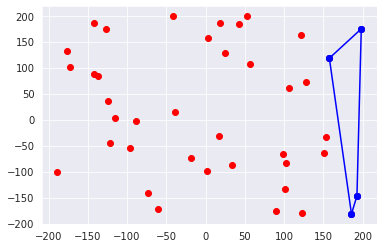

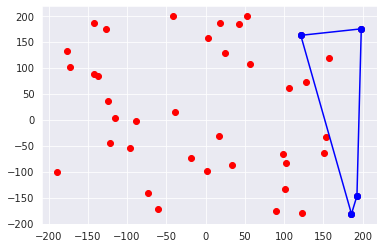

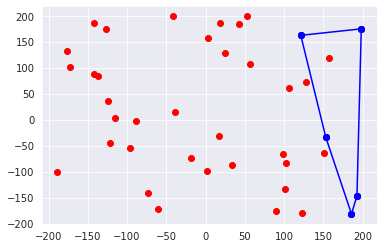

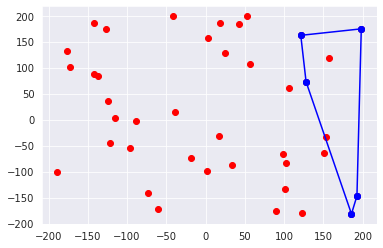

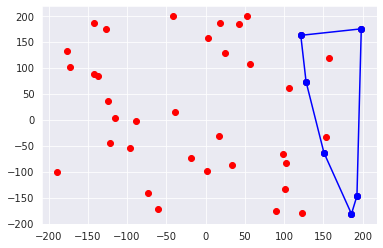

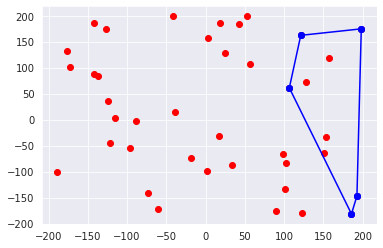

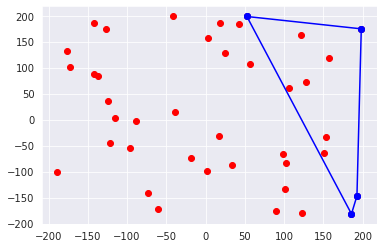

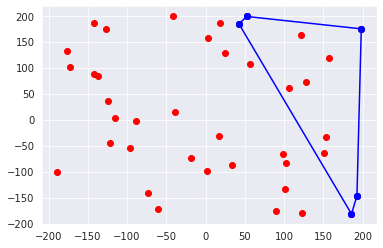

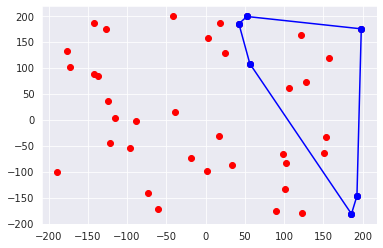

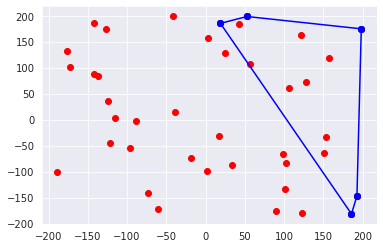

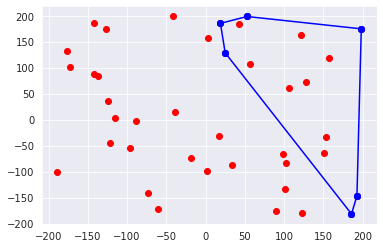

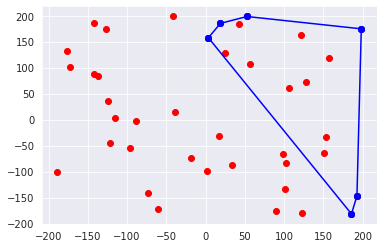

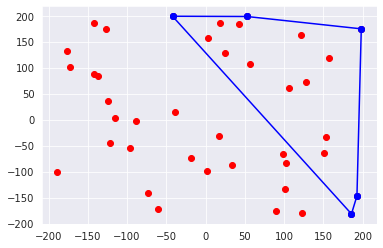

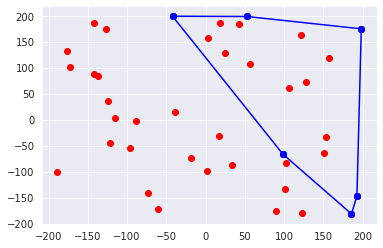

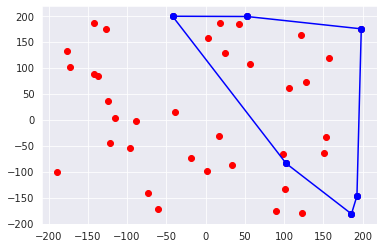

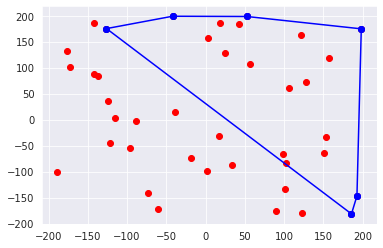

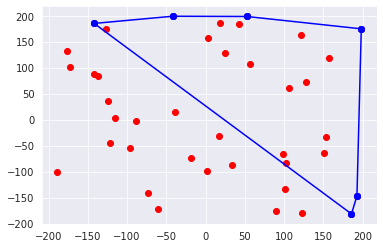

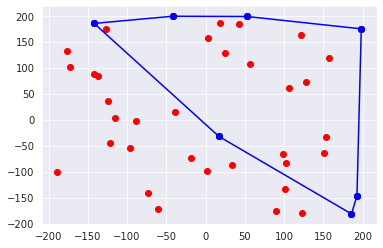

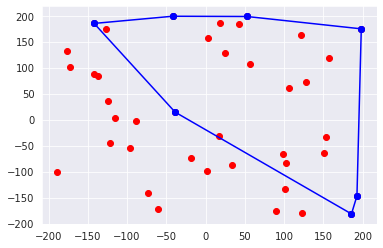

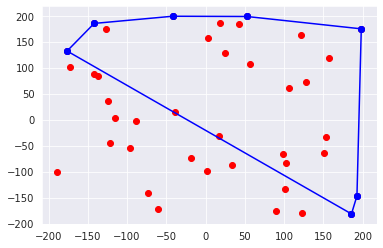

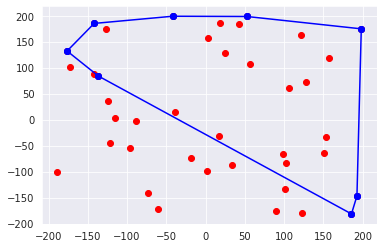

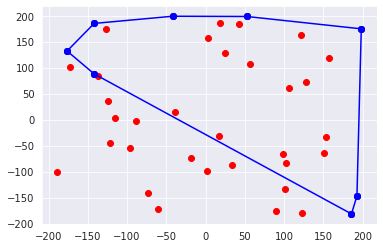

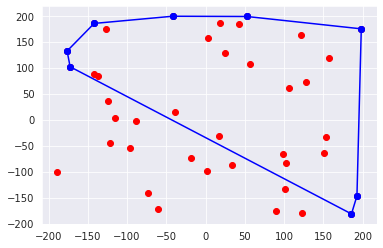

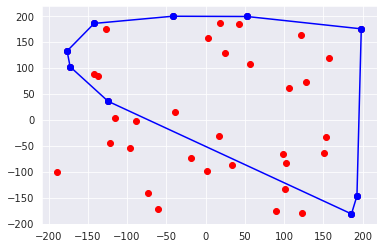

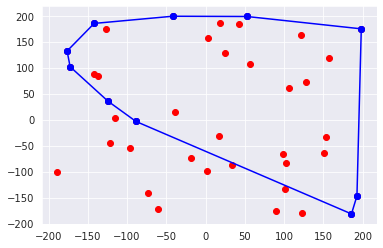

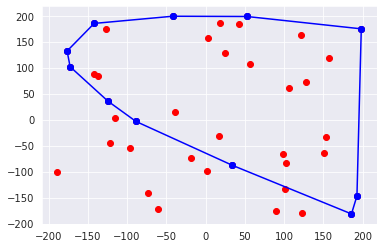

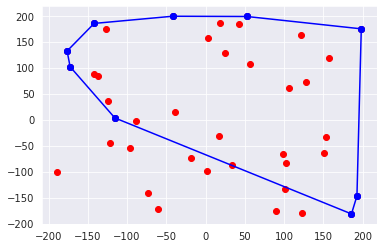

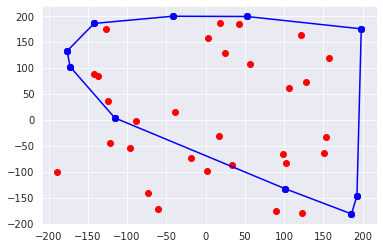

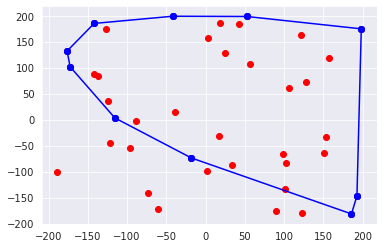

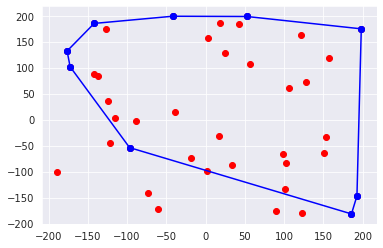

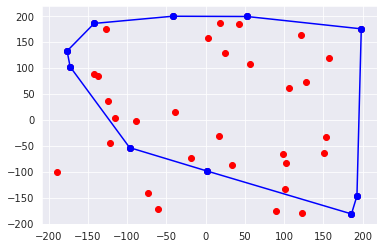

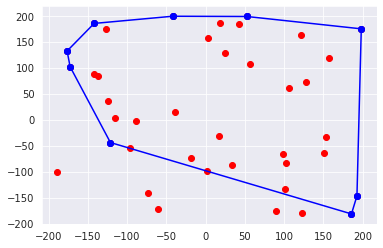

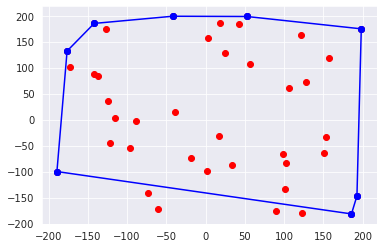

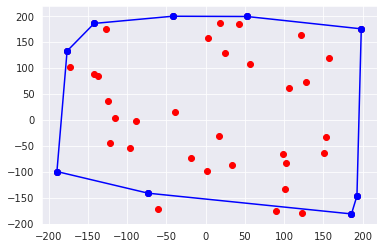

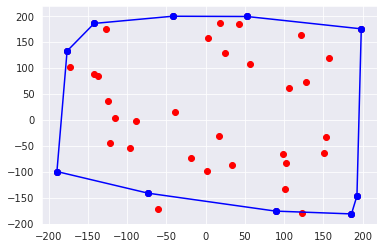

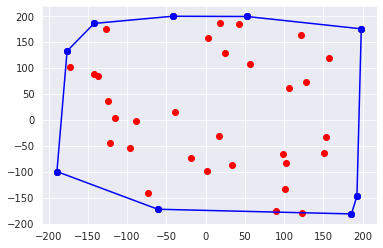

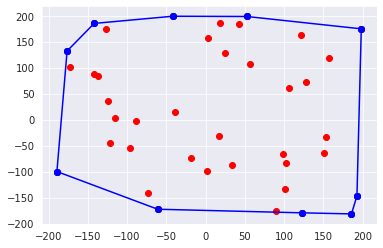

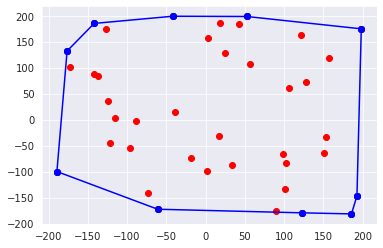

[(185.84901099845155, -181.45935680746538), (192.82412913275255, -146.8927695072009), (198.35132600748062, 174.6534289533198), (52.60322070400528, 198.41445152684327), (-42.11177672519776, 198.89507281100003), (-141.99726314203224, 185.06616068118598), (-176.45891175237068, 131.9752481893492), (-189.41974124207076, -99.93659313770573), (-61.01519356134634, -172.44441772848305), (122.48734905770641, -179.34355996831655)]


In [59]:
print(graham_algorithm(new_df_a))

**3. b)**

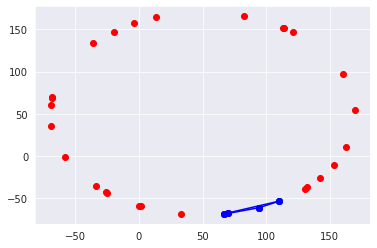

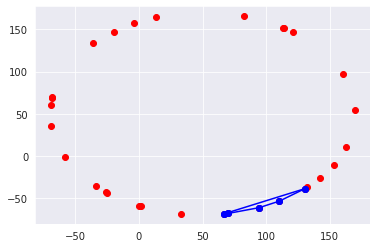

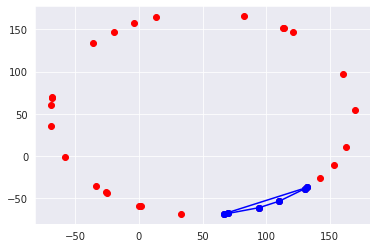

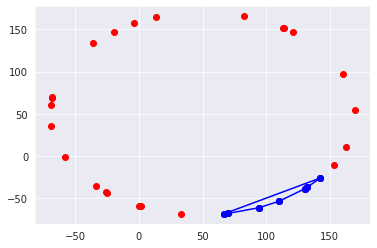

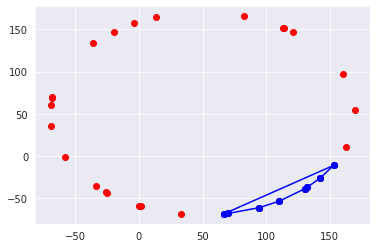

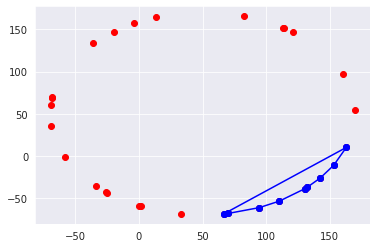

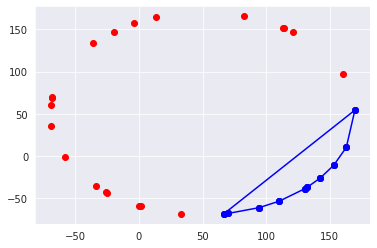

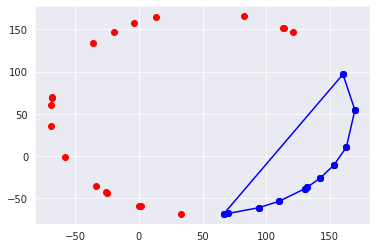

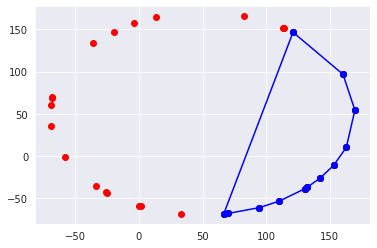

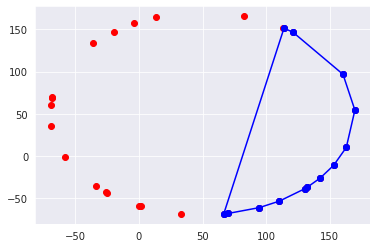

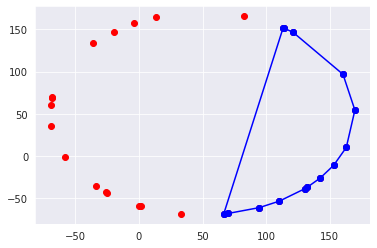

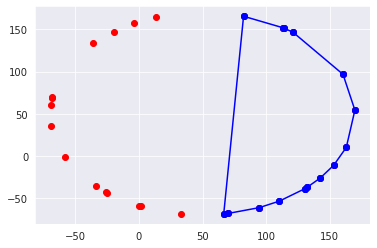

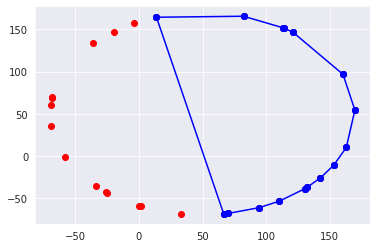

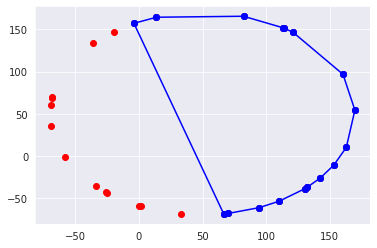

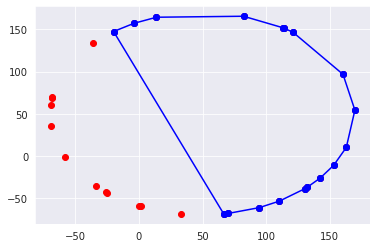

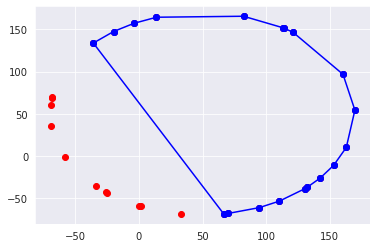

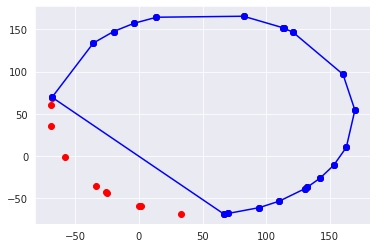

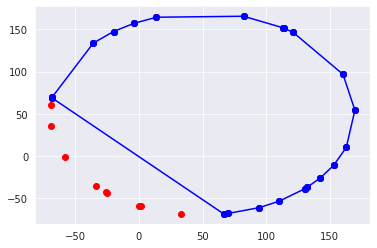

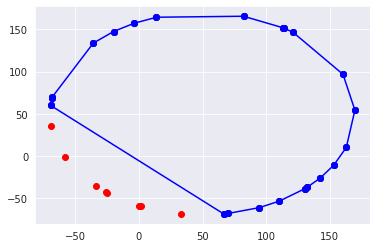

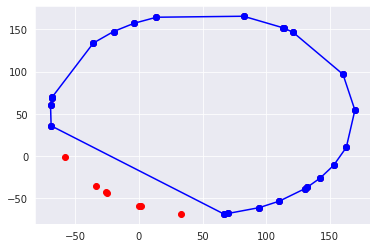

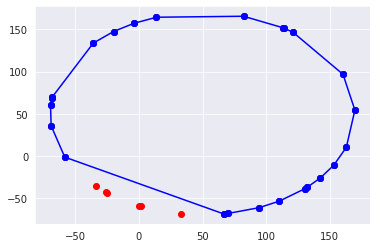

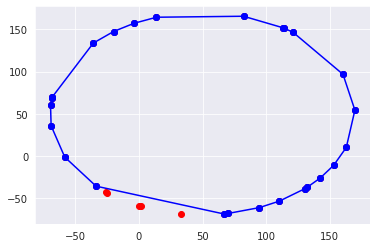

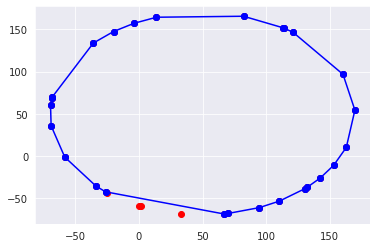

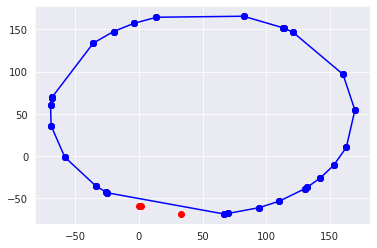

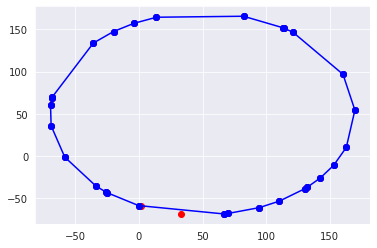

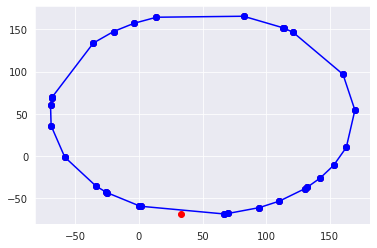

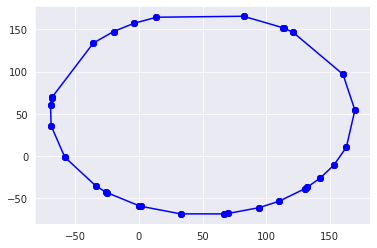

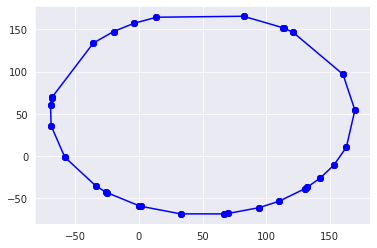

[(66.69341019822711, -68.83320266640013), (69.90680543272917, -68.33731067361411), (94.73702820546248, -61.34899329290613), (110.50290736830421, -53.631067735416096), (130.71158893352182, -38.80112280723819), (132.13322338697162, -37.48790554165656), (142.63606805359, -26.27947886273634), (153.16464066911502, -11.294835962031748), (163.13667592979294, 9.998843022269824), (169.92436905667455, 54.25977773581214), (160.52975995237895, 96.7244279244753), (121.23337367616709, 146.57021525662842), (114.12494940695656, 151.4297336265617), (113.44578451041049, 151.85593958065752), (82.2964136467134, 165.57223570373804), (13.770791315206331, 164.40036904692954), (-3.973463026449835, 157.17679454495948), (-19.984002290853, 147.4794307705676), (-35.91359860965714, 133.77859854365386), (-68.41072168350537, 69.4653792768451), (-68.52438864700703, 68.7608447531882), (-69.5941823656387, 59.860605675837284), (-69.1375993100732, 35.6392050835462), (-58.39142236986743, -1.4907715676994187), (-33.7797322

In [60]:
print(graham_algorithm(new_df_b))

**3. c)**

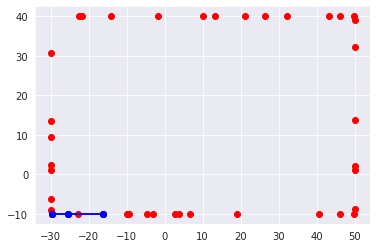

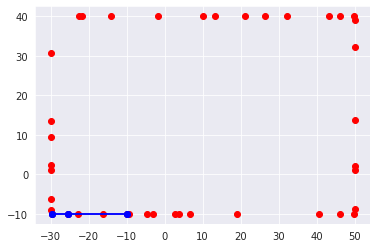

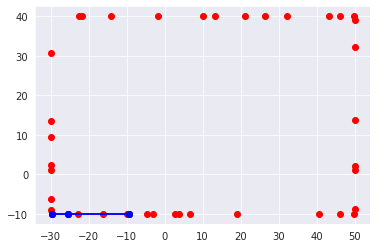

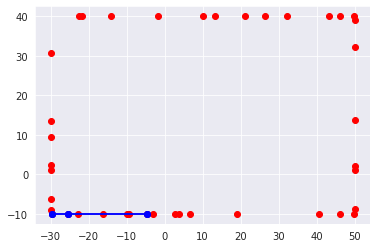

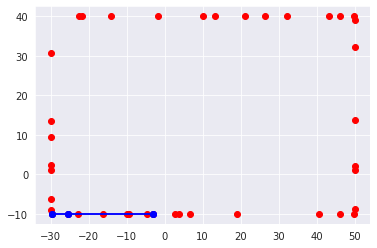

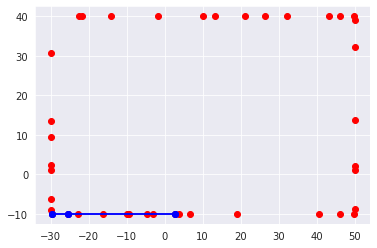

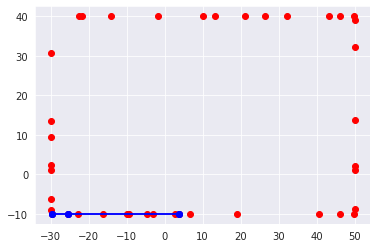

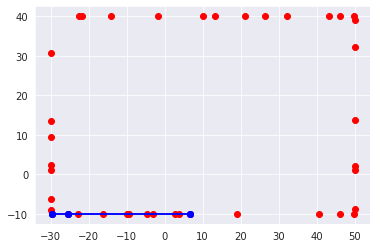

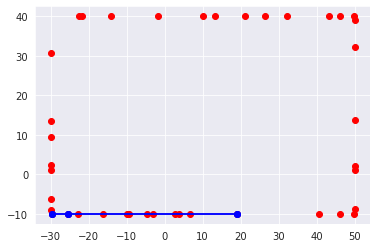

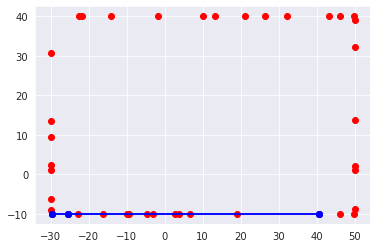

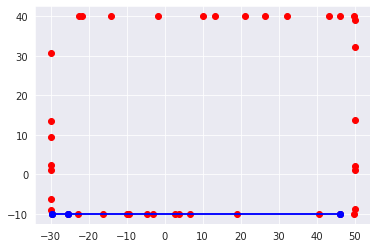

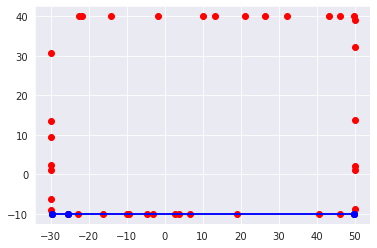

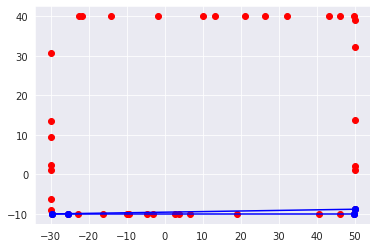

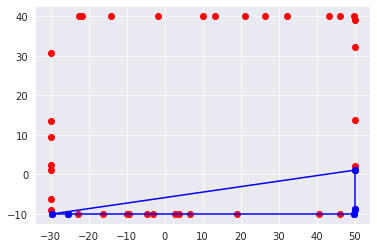

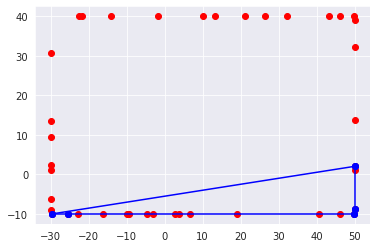

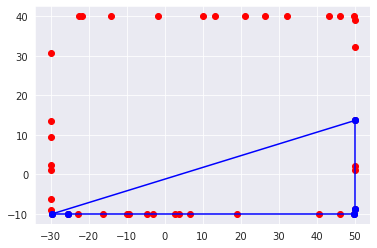

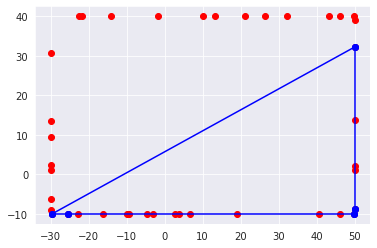

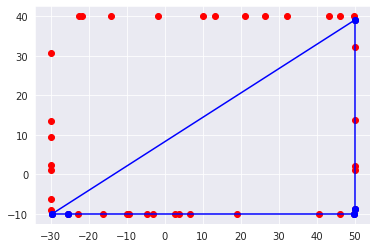

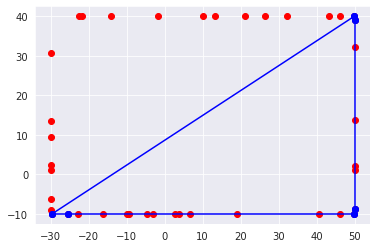

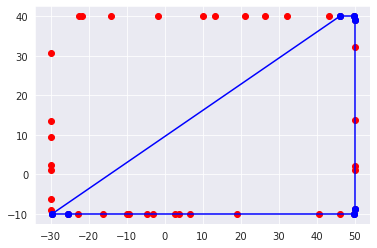

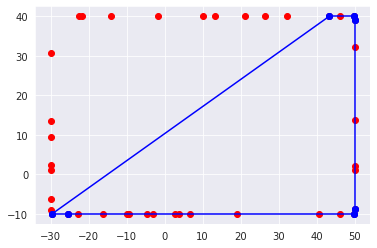

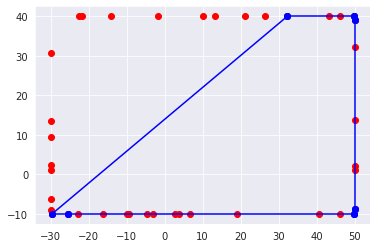

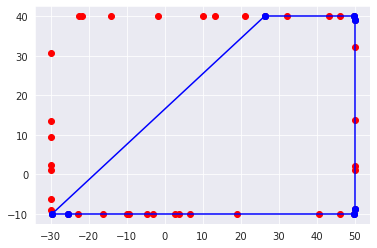

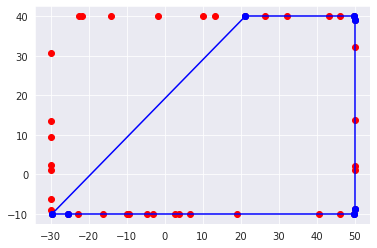

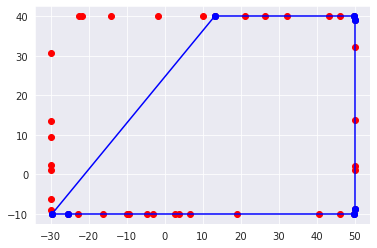

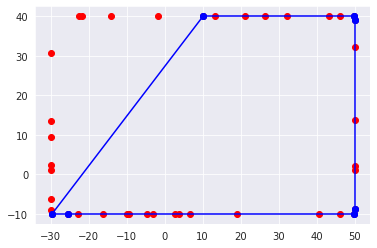

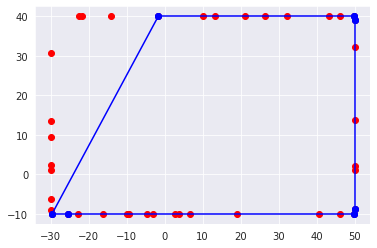

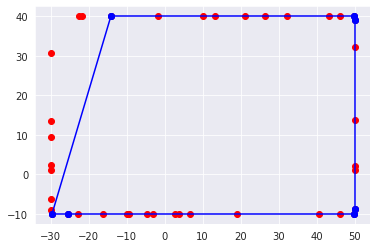

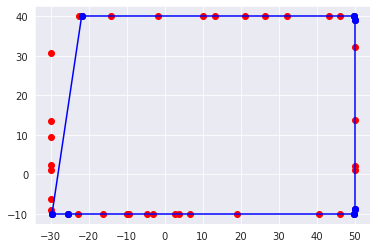

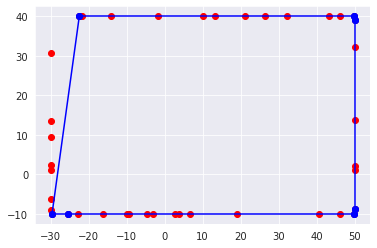

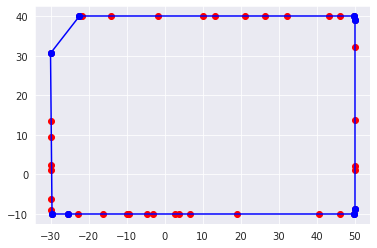

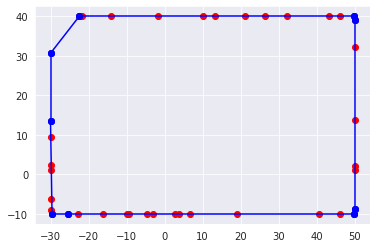

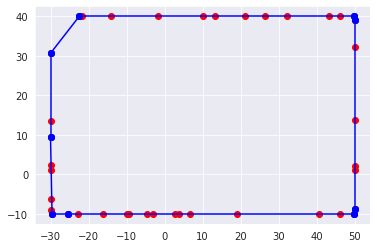

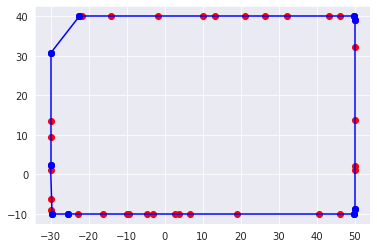

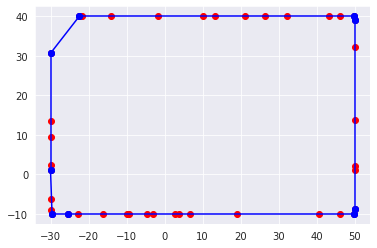

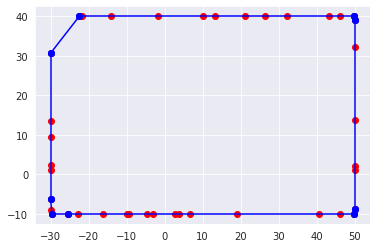

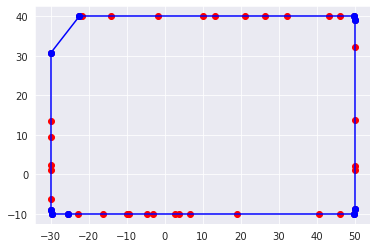

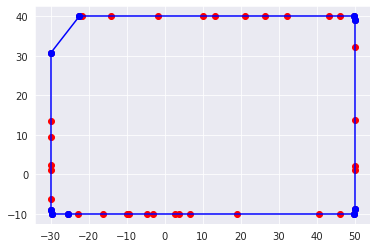

[(-29.611049351113763, -10.0), (-25.373556943584276, -10.0), (49.70795188681322, -10.0), (50.0, -8.814933174677506), (50.0, 39.066244077432444), (49.85125317634777, 40.0), (-22.439287898226667, 40.0), (-30.0, 30.641193705131997), (-30.0, -8.924513898322012)]


In [61]:
print(graham_algorithm(new_df_c))

**1. d)**

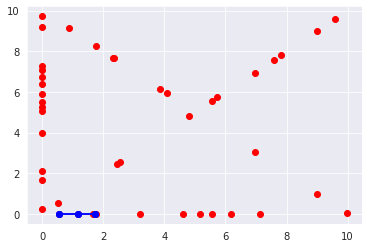

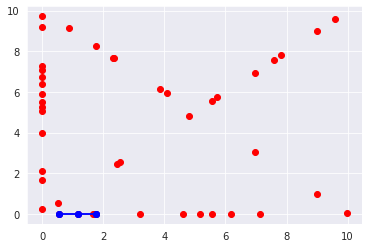

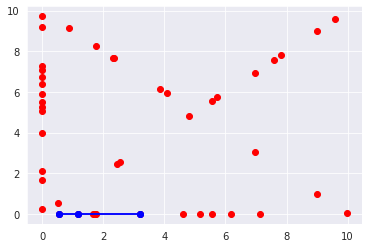

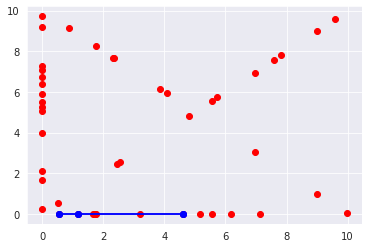

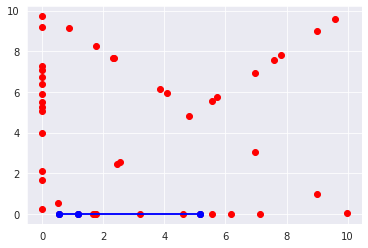

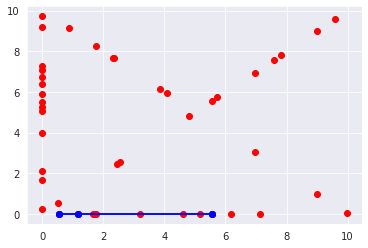

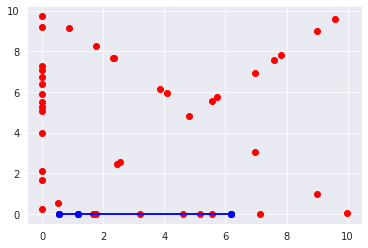

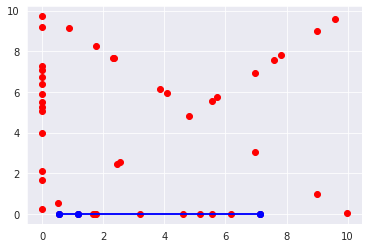

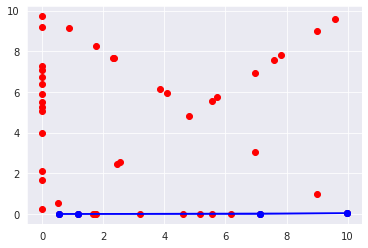

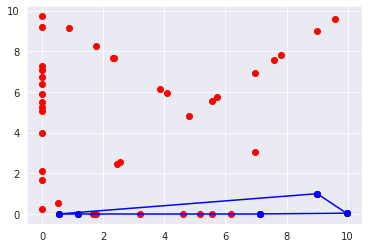

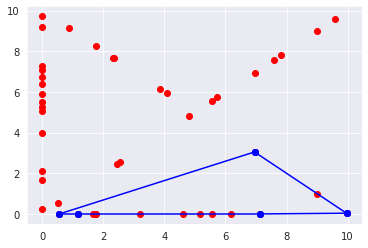

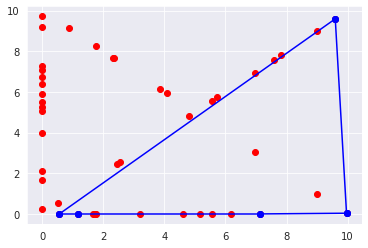

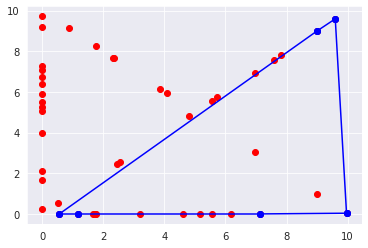

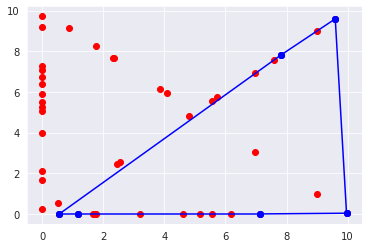

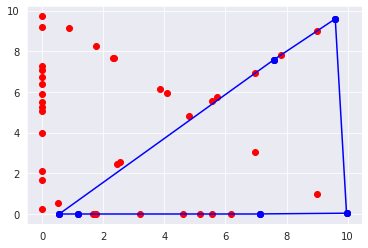

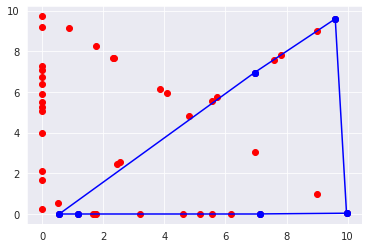

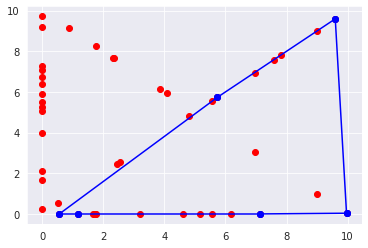

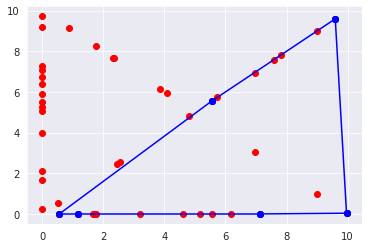

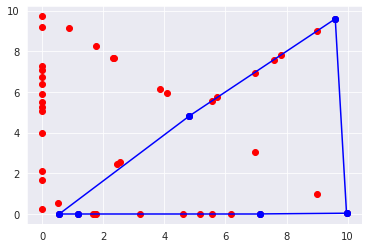

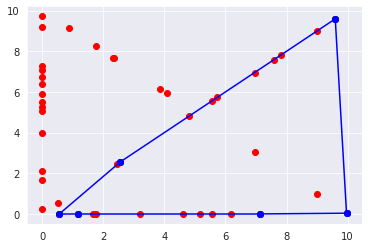

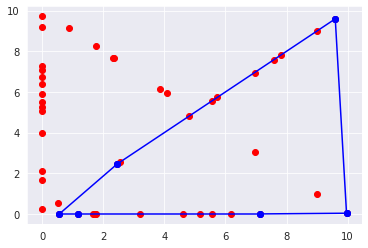

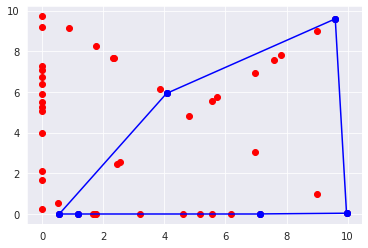

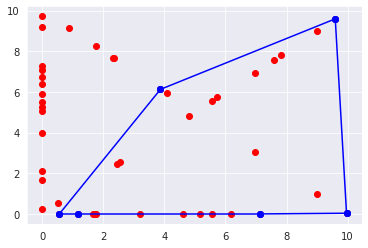

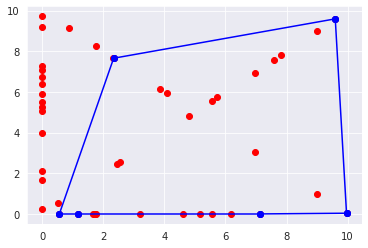

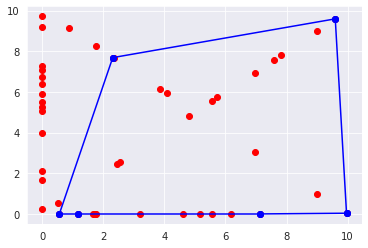

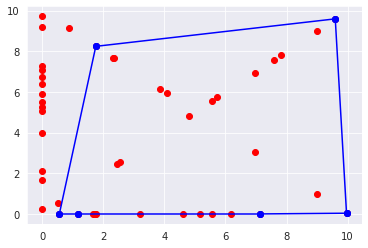

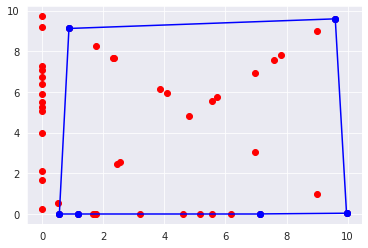

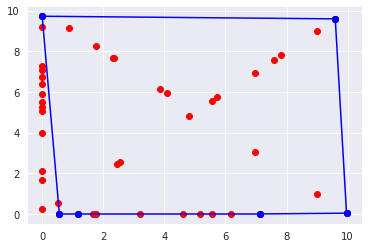

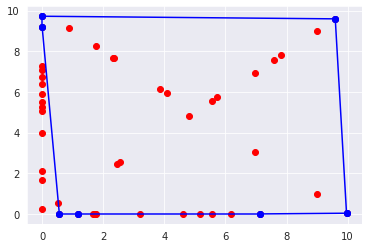

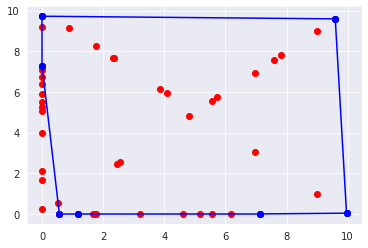

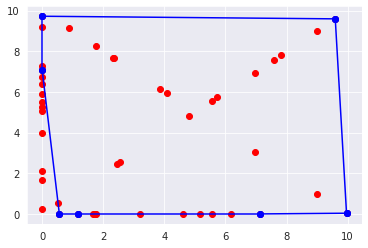

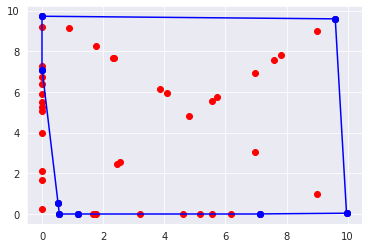

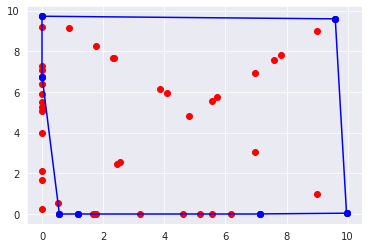

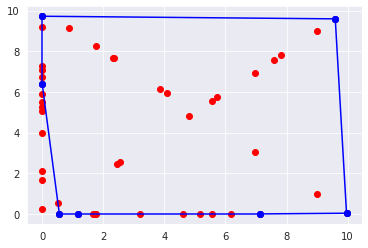

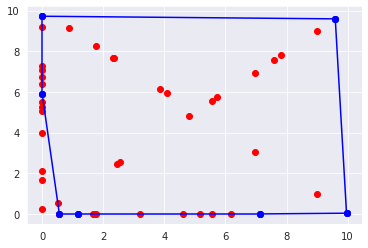

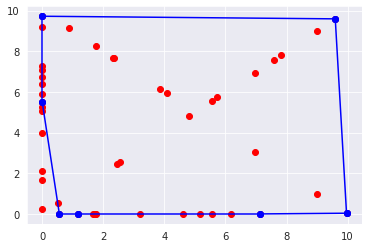

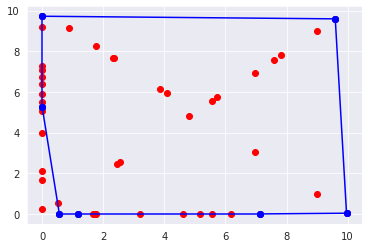

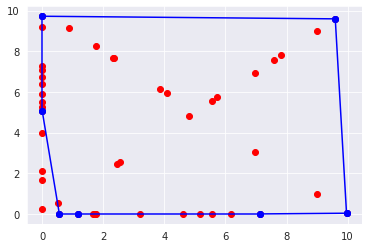

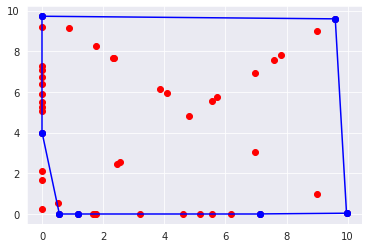

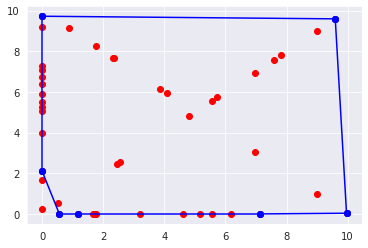

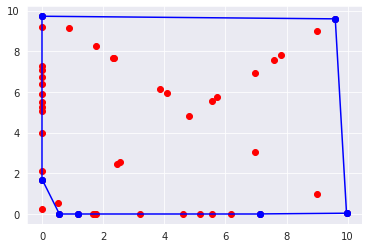

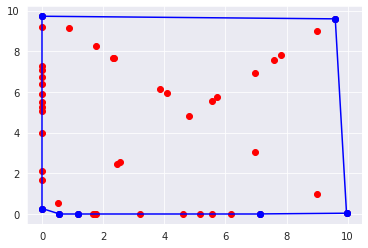

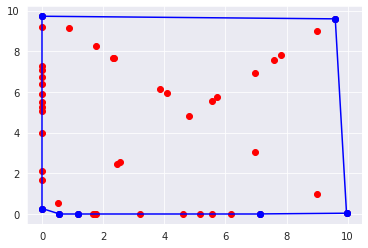

[(0.5626181595398609, 0.0), (1.1827841642935244, 0.0), (7.126613087218551, 0.0), (9.96534788006294, 0.03465211993706063), (9.596167886772854, 9.596167886772854), (0.0, 9.72446599800363), (0.0, 0.2647379205148015)]


In [62]:
print(graham_algorithm(df_d))

## Algorytm Jarvis

**1. a)**

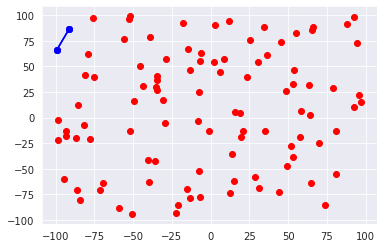

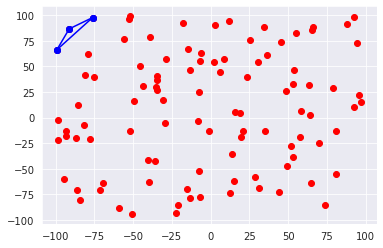

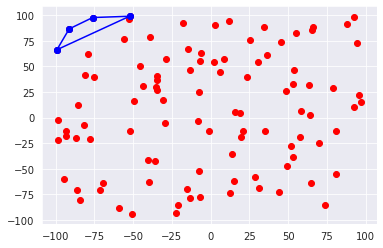

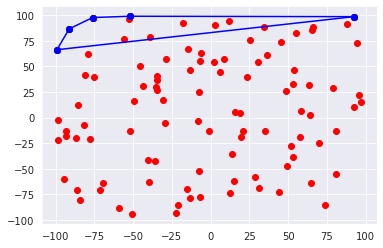

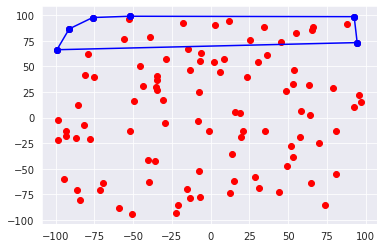

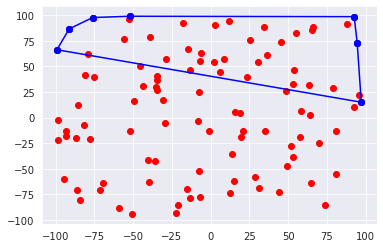

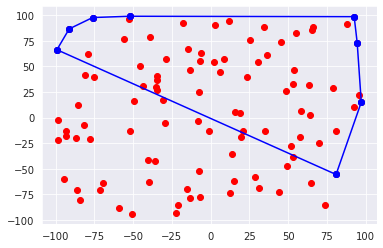

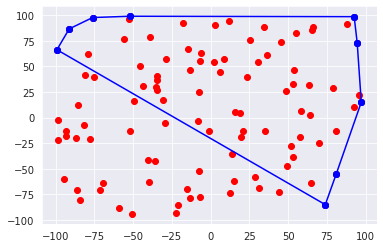

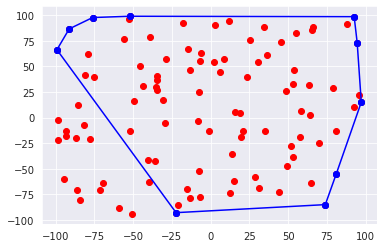

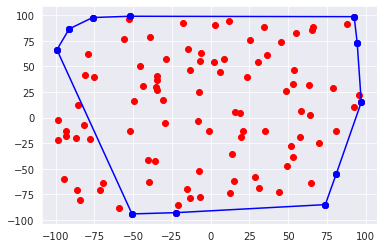

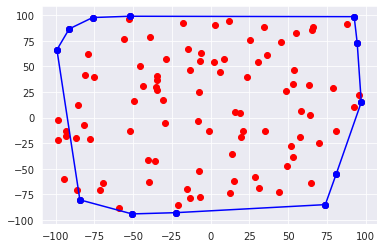

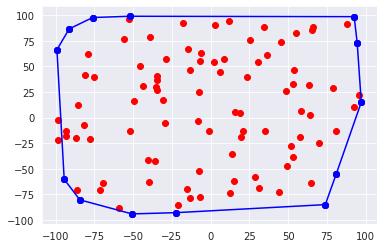

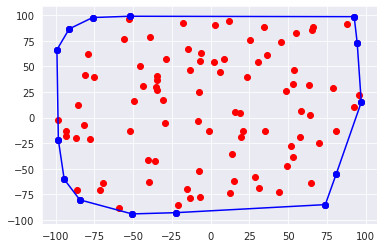

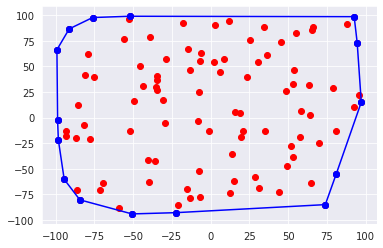

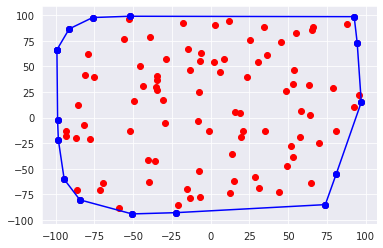

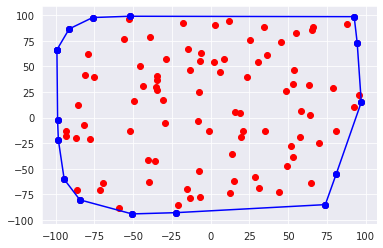

[(-99.19515808591122, 66.2609958901507), (-91.27552164394272, 86.61584907420823), (-76.16662097539864, 97.70328232203681), (-52.30547839710371, 98.98227699701775), (92.53723804712868, 98.59720266354341), (94.47973026473733, 73.22357130812696), (97.13014146862267, 14.965111865839503), (80.8591159791649, -55.656175794768934), (73.91827079605926, -85.10964404639583), (-22.344556138169125, -92.96152707313468), (-50.763963983638845, -94.18657679861629), (-84.38887706095935, -80.44197030014254), (-94.49418236533005, -60.39160981935241), (-98.26953393323863, -21.856101677836676), (-98.75700228704866, -2.5811027578587726), (-99.19515808591122, 66.2609958901507)]


In [63]:
print(jarvis_algorithm(df_a))

**3. b)**

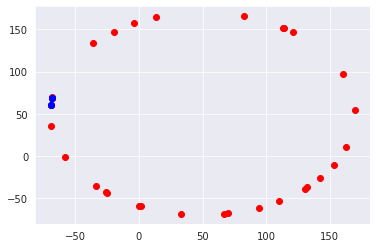

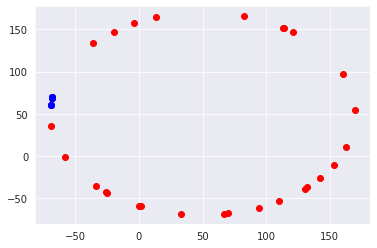

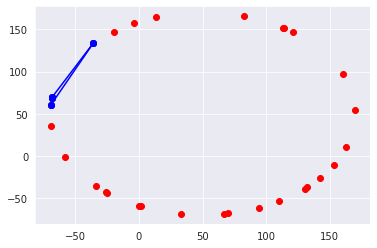

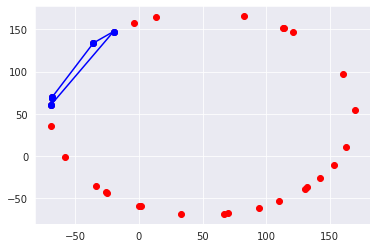

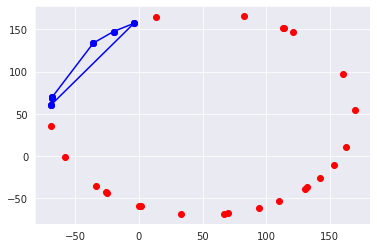

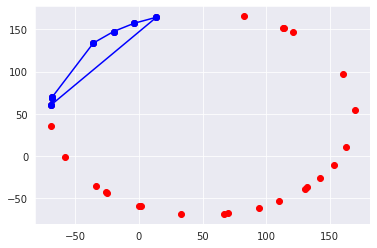

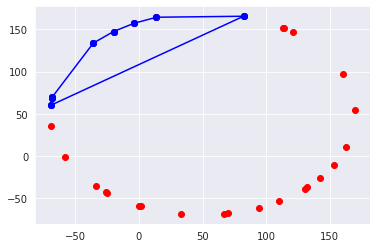

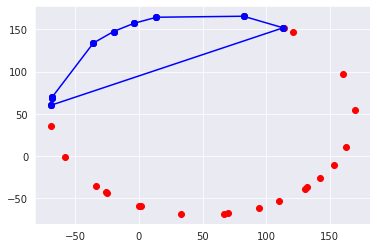

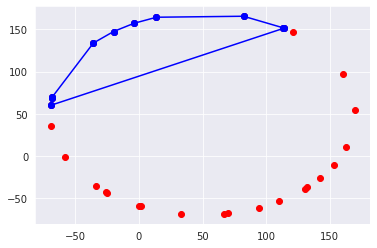

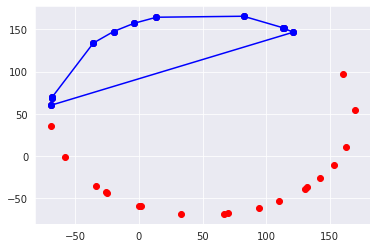

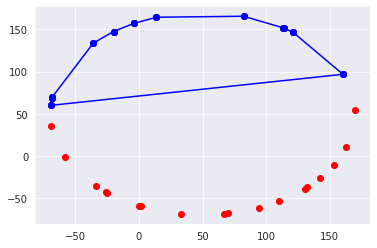

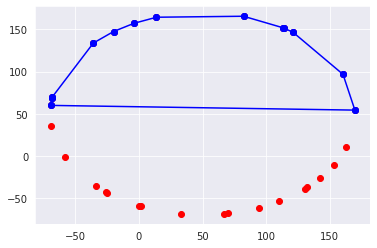

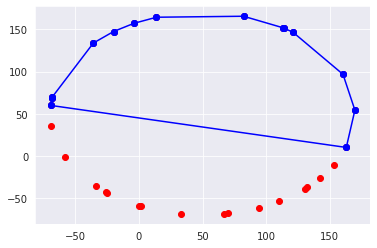

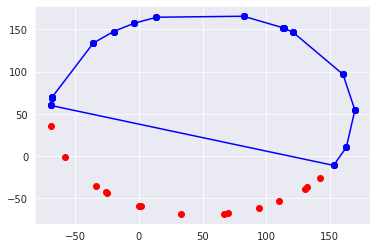

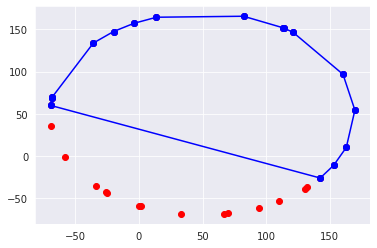

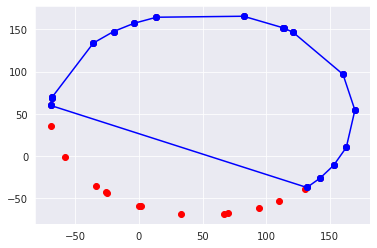

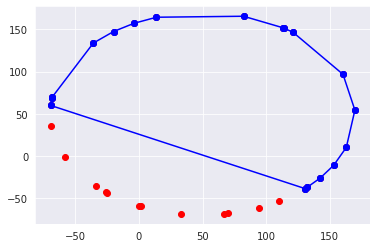

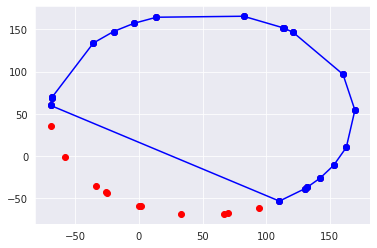

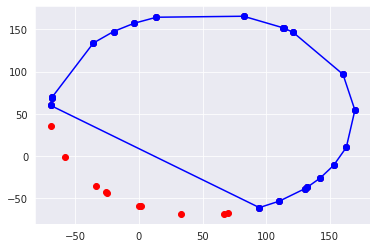

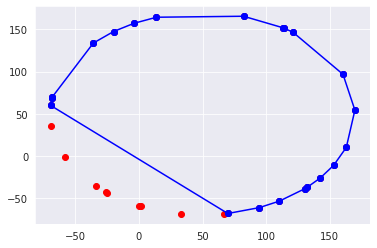

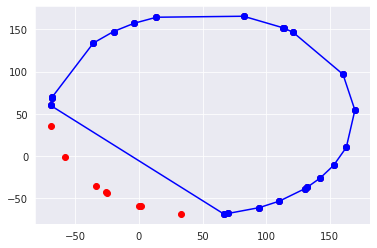

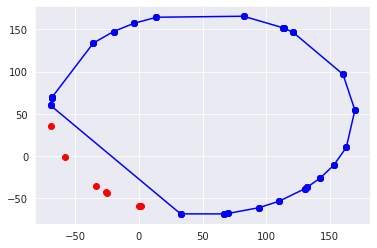

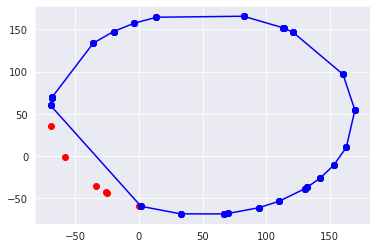

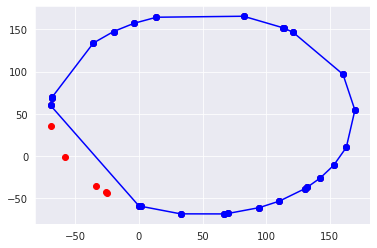

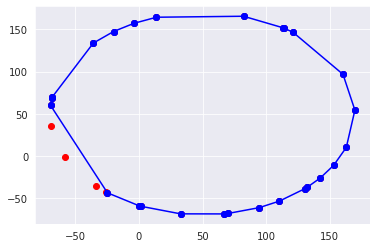

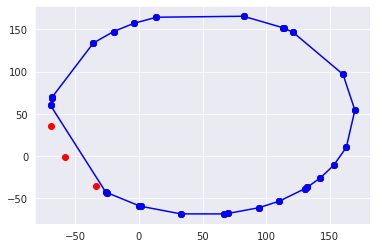

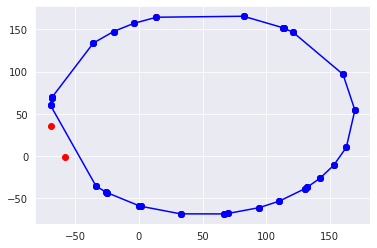

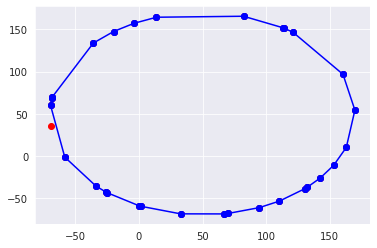

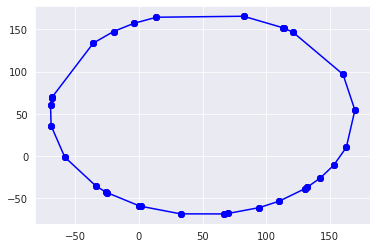

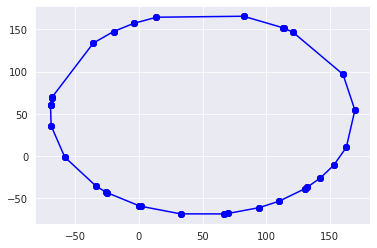

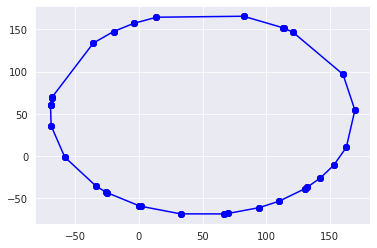

[(-69.5941823656387, 59.860605675837284), (-68.52438864700703, 68.7608447531882), (-68.41072168350537, 69.4653792768451), (-35.91359860965714, 133.77859854365386), (-19.984002290853, 147.4794307705676), (-3.973463026449835, 157.17679454495948), (13.770791315206331, 164.40036904692954), (82.2964136467134, 165.57223570373804), (113.44578451041049, 151.85593958065752), (114.12494940695656, 151.4297336265617), (121.23337367616709, 146.57021525662842), (160.52975995237895, 96.7244279244753), (169.92436905667455, 54.25977773581214), (163.13667592979294, 9.998843022269824), (153.16464066911502, -11.294835962031748), (142.63606805359, -26.27947886273634), (132.13322338697162, -37.48790554165656), (130.71158893352182, -38.80112280723819), (110.50290736830421, -53.631067735416096), (94.73702820546248, -61.34899329290613), (69.90680543272917, -68.33731067361411), (66.69341019822711, -68.83320266640013), (32.72585247640133, -68.75017400969546), (1.5366547780862803, -59.77843217090329), (-0.3200818

In [64]:
print(jarvis_algorithm(new_df_b))

**1. c)**

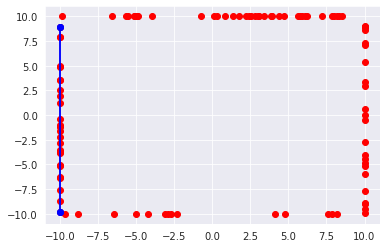

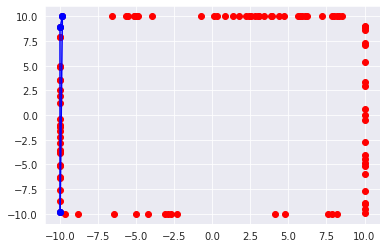

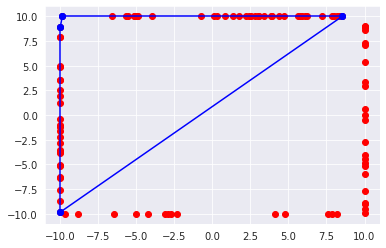

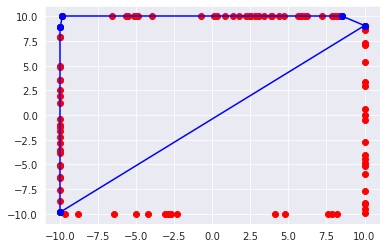

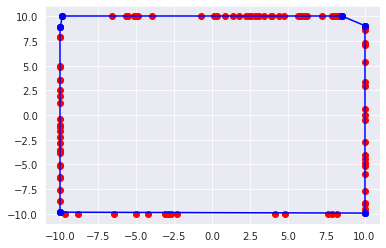

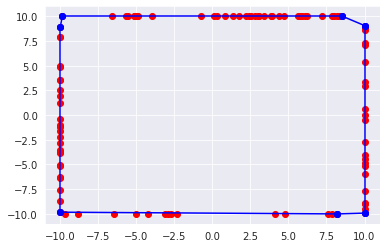

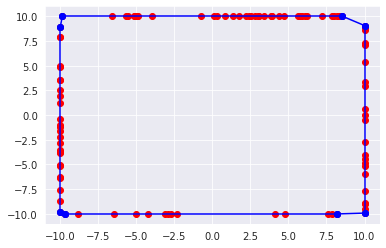

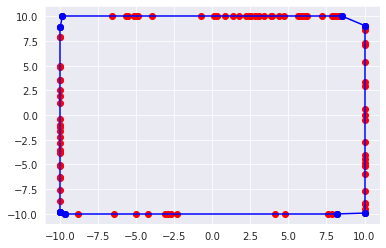

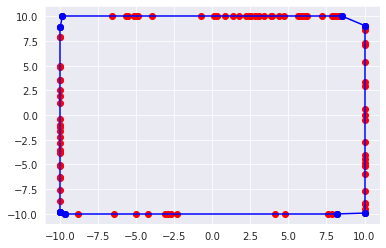

[(-10.0, -9.825223433542867), (-10.0, 8.883074693463424), (-9.85598237618683, 10.0), (8.543435135630403, 10.0), (10.0, 9.057345795465551), (10.0, -9.917210207095593), (8.222480729814528, -10.0), (-9.706898243772699, -10.0), (-10.0, -9.825223433542867)]


In [65]:
print(jarvis_algorithm(df_c))

**3. d)**

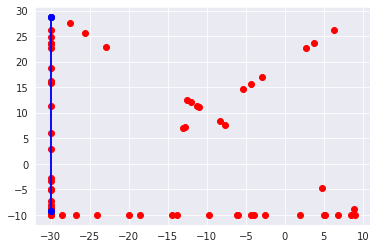

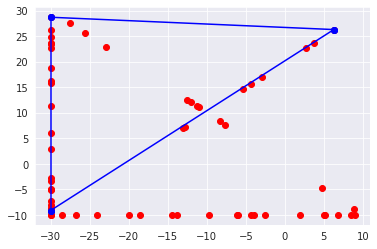

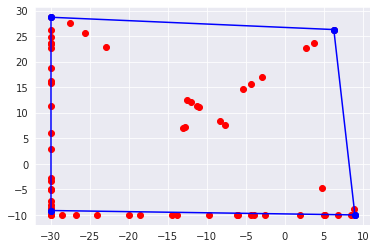

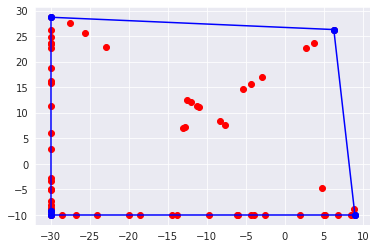

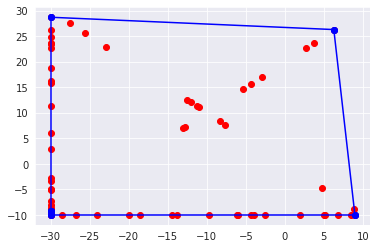

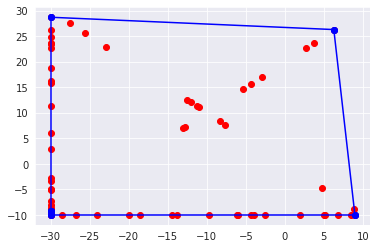

[(-30.0, -9.139617247785106), (-30.0, 28.683458427847285), (6.27273734748713, 26.27273734748713), (8.974685259497633, -10.0), (-29.955259619391292, -10.0), (-30.0, -9.139617247785106)]


In [66]:
print(jarvis_algorithm(new_df_d))

---
## Porównaj czasy działania obu algorytmów w zależności od liczby punktów w poszczególnych zbiorach (a, b, c, d).

In [67]:
def count_time(algorithm, df):
    start = perf_counter()
    algorithm(df, visualize=False)
    end = perf_counter()
    time = end - start
    return time

**a)**

In [68]:
def time_comparison_on_the_range():
    columns = ["Number of points", "a", "b", "Time of graham algorithm", "Time of jarvis algorithm", "Faster algorithm",
               "Time comparison"]
    data = []
    for i in range(1, 11):
        current_range = [-100, 100]
        num_of_points = i * 100
        new_data = random_points_on_the_range(num_of_points, current_range)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, current_range[0], current_range[1], graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [69]:
time_comparison_on_the_range()

,Number of points,a,b,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,100,-100,100,0.014424,0.116919,graham_algorithm,0.102495
1,200,-100,100,0.027637,0.285697,graham_algorithm,0.258060
2,300,-100,100,0.040377,0.478292,graham_algorithm,0.437915
3,400,-100,100,0.058939,0.571096,graham_algorithm,0.512157
4,500,-100,100,0.074181,0.812670,graham_algorithm,0.738489
5,600,-100,100,0.084585,0.991046,graham_algorithm,0.906461
6,700,-100,100,0.100589,0.854277,graham_algorithm,0.753688
7,800,-100,100,0.115815,1.358308,graham_algorithm,1.242493
8,900,-100,100,0.131302,1.198146,graham_algorithm,1.066844
9,1000,-100,100,0.151116,1.506075,graham_algorithm,1.354959


**b)**

In [70]:
def time_comparison_on_the_circle():
    columns = ["Number of points", "center", "R", "Time of graham algorithm", "Time of jarvis algorithm",
               "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        center = [np.random.uniform(-20, 20), np.random.uniform(-20, 20)]
        R = np.random.uniform(1, 20)
        num_of_points = i * 10
        new_data = random_points_on_the_circle(num_of_points, center, R)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, center, R, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [71]:
time_comparison_on_the_circle()

,Number of points,center,R,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,10,"[-5.865272829867321, -7.426147631745463]",4.065151,0.001788,0.011007,graham_algorithm,0.009220
1,20,"[-16.943363031972886, -18.505443842671458]",5.041718,0.003217,0.038924,graham_algorithm,0.035707
2,30,"[0.9774635434716643, 11.10316646836257]",9.211305,0.004579,0.086783,graham_algorithm,0.082204
3,40,"[-17.977872044120776, -10.900529188635257]",12.034991,0.005995,0.141732,graham_algorithm,0.135737
4,50,"[-2.0637997879830827, -2.984998611554982]",1.331135,0.007123,0.226005,graham_algorithm,0.218882
5,60,"[-4.1955344439791595, 4.74315449307522]",2.071786,0.007930,0.327717,graham_algorithm,0.319787
6,70,"[-11.356794157203014, -16.13780215200522]",1.537947,0.009203,0.427045,graham_algorithm,0.417842
7,80,"[14.122967935421833, 15.556499004885957]",7.071968,0.010821,0.582782,graham_algorithm,0.571961
8,90,"[7.407765792629405, -18.682827343966878]",9.704113,0.012461,0.742782,graham_algorithm,0.730321
9,100,"[-18.877905791387626, -7.163459540015879]",9.330126,0.014191,0.918682,graham_algorithm,0.904490


**c)**

In [72]:
def time_comparison_on_rectangle():
    columns = ["Number of points", "vertices", "Time of graham algorithm", "Time of jarvis algorithm",
               "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        y_1 = np.random.randint(-50, 40)
        y_2 = np.random.randint(-50, 40)
        vertices = [(x_1, y_1), (x_1, y_2), (x_2, y_1), (x_2, y_2)]
        num_of_points = i * 50
        new_data = random_points_on_the_rectangle(num_of_points, vertices)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((num_of_points, vertices, graham_time, jarvis_time, faster_algorithm, time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [73]:
time_comparison_on_rectangle()

,Number of points,vertices,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,50,"[(-32, 13), (-32, 16), (13, 13), (13, 16)]",0.008174,0.038948,graham_algorithm,0.030773
1,100,"[(-23, -48), (-23, 14), (-44, -48), (-44, 14)]",0.014531,0.077420,graham_algorithm,0.062890
2,150,"[(8, -6), (8, 24), (23, -6), (23, 24)]",0.022391,0.116046,graham_algorithm,0.093655
3,200,"[(31, -36), (31, -26), (-32, -36), (-32, -26)]",0.028003,0.154884,graham_algorithm,0.126881
4,250,"[(-6, -37), (-6, 16), (1, -37), (1, 16)]",0.035346,0.198739,graham_algorithm,0.163393
5,300,"[(-42, 8), (-42, 32), (16, 8), (16, 32)]",0.044912,0.237681,graham_algorithm,0.192770
6,350,"[(-12, 15), (-12, -48), (23, 15), (23, -48)]",0.049973,0.277794,graham_algorithm,0.227821
7,400,"[(8, 8), (8, -37), (-13, 8), (-13, -37)]",0.059835,0.317786,graham_algorithm,0.257951
8,450,"[(3, -29), (3, 26), (2, -29), (2, 26)]",0.062765,0.322944,graham_algorithm,0.260179
9,500,"[(-29, 0), (-29, 15), (-32, 0), (-32, 15)]",0.073944,0.403216,graham_algorithm,0.329272


**d)**

In [74]:
def time_comparison_on_square():
    columns = ["Side number of points", "Diagonal number of points", "vertices", "Time of graham algorithm",
               "Time of jarvis algorithm", "Faster algorithm", "Time comparison"]
    data = []
    for i in range(1, 11):
        x_1 = np.random.randint(-50, 40)
        x_2 = np.random.randint(-50, 40)
        side = abs(x_2 - x_1)
        y = np.random.randint(-50, 40)
        vertices = [(x_1, y), (x_2, y), (x_1, y + side), (x_2, y + side)]
        side_num_of_points = i * 50
        diag_num_of_points = i * 20
        new_data = random_points_on_square(vertices, side_num_of_points, diag_num_of_points)
        new_df = pd.DataFrame(data=new_data, columns=['X', 'Y'])
        graham_time = count_time(graham_algorithm, new_df)
        jarvis_time = count_time(jarvis_algorithm, new_df)

        faster_algorithm = None
        if graham_time < jarvis_time:
            faster_algorithm = graham_algorithm.__name__
        else:
            faster_algorithm = jarvis_algorithm.__name__

        time_comparison = abs(graham_time - jarvis_time)
        data.append((side_num_of_points, diag_num_of_points, vertices, graham_time, jarvis_time, faster_algorithm,
                     time_comparison))
    return pd.DataFrame(data=data, columns=columns)

In [75]:
time_comparison_on_square()

,Side number of points,Diagonal number of points,vertices,Time of graham algorithm,Time of jarvis algorithm,Faster algorithm,Time comparison
0,50,20,"[(21, -17), (-44, -17), (21, 48), (-44, 48)]",0.010611,0.046369,graham_algorithm,0.035758
1,100,40,"[(-42, -25), (15, -25), (-42, 32), (15, 32)]",0.020488,0.091995,graham_algorithm,0.071506
2,150,60,"[(39, 2), (-36, 2), (39, 77), (-36, 77)]",0.033614,0.157844,graham_algorithm,0.124231
3,200,80,"[(-33, -26), (-35, -26), (-33, -24), (-35, -24)]",0.044462,0.150181,graham_algorithm,0.105718
4,250,100,"[(18, -14), (4, -14), (18, 0), (4, 0)]",0.052345,0.212672,graham_algorithm,0.160326
5,300,120,"[(-20, 8), (-4, 8), (-20, 24), (-4, 24)]",0.062086,0.261852,graham_algorithm,0.199766
6,350,140,"[(-35, -16), (-14, -16), (-35, 5), (-14, 5)]",0.076872,0.297913,graham_algorithm,0.221041
7,400,160,"[(9, 18), (0, 18), (9, 27), (0, 27)]",0.084802,0.354342,graham_algorithm,0.269540
8,450,180,"[(-26, -49), (-26, -49), (-26, -49), (-26, -49)]",0.836710,37.507092,graham_algorithm,36.670383
9,500,200,"[(-38, -49), (-9, -49), (-38, -20), (-9, -20)]",0.111099,0.437318,graham_algorithm,0.326219
